# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

Using TensorFlow backend.


The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

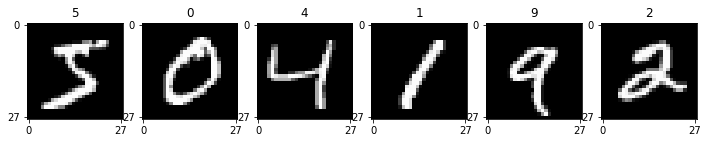

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(12,12))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[0,27], yticks=[0,27])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

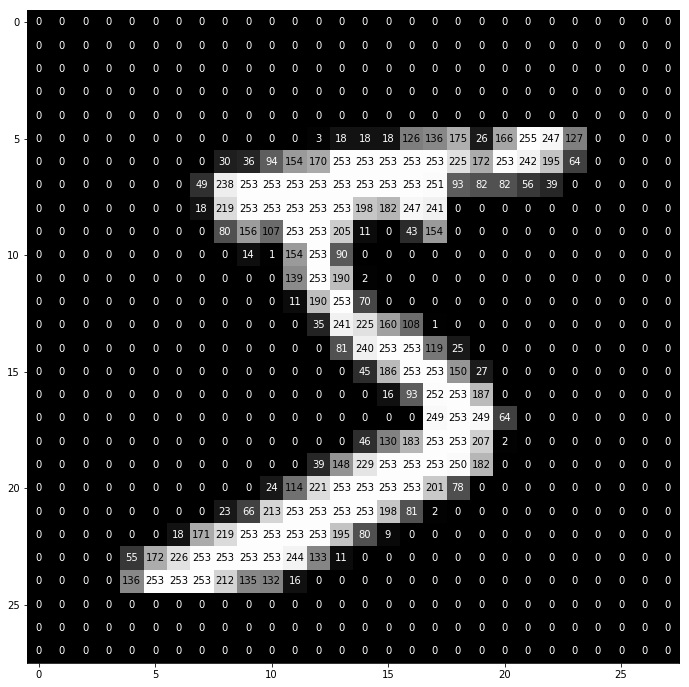

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

In [5]:
fig1 = plt.figure(figsize = (12,12)) 
ax1 = fig.add_subplot(111)
visualize_input(X_train[0], ax1)

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [6]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [7]:
reshaped_Xtrain = X_train.reshape(*X_train.shape[:1], -1)
reshaped_Xtest =  X_test.reshape(*X_test.shape[:1], -1)
print(reshaped_Xtrain.shape)
print(reshaped_Xtest.shape)
print(X_train.shape[1:])

(60000, 784)
(10000, 784)
(28, 28)


### 6. Define the Model Architecture

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 1,863,690.0
Trainable params: 1,863,690.0
Non-trainable params: 0.0
_________________________________________________________________


### 7. Compile the Model

In [9]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [ ]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=1)
print(score)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

 9760/10000 [============================>.] - ETA: 0s[2.3025734573364258, 0.095799999999999996]
Test accuracy: 9.5800%


### 9. Train the Model

In [ ]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 27s - loss: 2.2869 - acc: 0.1136 - val_loss: 2.2502 - val_acc: 0.1060
Epoch 2/10
48000/48000 [==============================] - 34s - loss: 2.1635 - acc: 0.4900 - val_loss: 2.0394 - val_acc: 0.6607
Epoch 3/10
48000/48000 [==============================] - 34s - loss: 1.9242 - acc: 0.5781 - val_loss: 1.7308 - val_acc: 0.6678
Epoch 4/10
48000/48000 [==============================] - 33s - loss: 1.6590 - acc: 0.5791 - val_loss: 1.4112 - val_acc: 0.6813
Epoch 5/10
48000/48000 [==============================] - 29s - loss: 1.4228 - acc: 0.5944 - val_loss: 1.1372 - val_acc: 0.7221
Epoch 6/10
48000/48000 [==============================] - 26s - loss: 1.2327 - acc: 0.6051 - val_loss: 0.9389 - val_acc: 0.7062
Epoch 7/10
48000/48000 [==============================] - 33s - loss: 1.1043 - acc: 0.6095 - val_loss: 0.8164 - val_acc: 0.7195
Epoch 8/10
48000/48000 [==============================

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [ ]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [ ]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)